<a href="https://colab.research.google.com/github/kateprashant/TSAI_Repository/blob/master/AssignMent_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q keras
!pip3 install -q ann_visualizer
!pip install -q graphviz
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.datasets import mnist

from ann_visualizer.visualize import ann_viz;

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


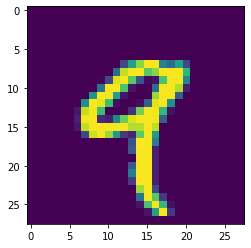

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)  # 60000, 28 X 28 X 1 matrices
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [14]:

model2 = Sequential()

 
model2.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #32, 3X3 filters convolve with 28X28X1 input image to give output 32 channels across 26X26 matrices

model2.add(Convolution2D(48, 3,3, activation='relu')) #34,3 X3 filters * with 32X26X26 ->   24 X 24 X48
model2.add(Convolution2D(60, 3,3, activation='relu')) #60,3 X3 filters * with 48X22X22 ->   22 X 22 X60
model2.add(MaxPooling2D(pool_size=(2, 2))) # ->  11 X 11 X 60

model2.add(Convolution2D(48, 3,3, activation='relu')) #48,3 X3 filters * with 11X11X 60->   9 X 9 X48
model2.add(Convolution2D(60, 3,3, activation='relu')) #60,3 X3 filters * with 9X9X48 ->   7 X 7 X60

model2.add(Convolution2D(10, 1, activation='relu')) # 10, 1 X 1 filters convolve with all 60 channels of 7X7 matrices  to give output 10 channels across 7 X 7 matrices
model2.add(Convolution2D(10, 7))  #10, 7X7 filters convolve with 10 channels of 7 X 7 matrices to give output 10 channels across 1 X 1
model2.add(Flatten())
model2.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(60, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(60, (3, 3), activation="relu")`
  if sys.path[0] == '':


In [15]:
model2.summary()
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
            metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 48)        13872     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 60)        25980     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 60)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 48)          25968     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 60)          25980     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 10)         

In [16]:
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10





60000/60000 [==============================] - 301s 5ms/step - loss: 0.1469 - acc: 0.9543
Epoch 2/10
60000/60000 [==============================] - 302s 5ms/step - loss: 0.0482 - acc: 0.9851
Epoch 3/10
60000/60000 [==============================] - 303s 5ms/step - loss: 0.0360 - acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 302s 5ms/step - loss: 0.0301 - acc: 0.9904
Epoch 5/10
60000/60000 [==============================] - 303s 5ms/step - loss: 0.0236 - acc: 0.9927
Epoch 6/10
60000/60000 [==============================] - 304s 5ms/step - loss: 0.0200 - acc: 0.9938
Epoch 7/10
60000/60000 [==============================] - 304s 5ms/step - loss: 0.0175 - acc: 0.9943
Epoch 8/10
60000/60000 [==============================] - 302s 5ms/step - loss: 0.0152 - acc: 0.9951
Epoch 9/10
60000/60000 [==============================] - 304s 5ms/step - loss: 0.0123 - acc: 0.9963
Epoch 10/10
60000/60000 [==============================] - 305s 5ms/step - loss: 0.0

In [17]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03251627337348873, 0.992]


In [0]:
y_pred = model2.predict(X_test)

In [20]:
print(y_pred[:9])
print(y_test[:9])

[[1.86549623e-16 7.93794862e-16 1.31508182e-08 3.30339689e-09
  5.63048474e-22 2.19136886e-16 1.78986931e-29 1.00000000e+00
  1.17157734e-17 3.08009417e-11]
 [9.62863144e-13 1.93670378e-16 1.00000000e+00 1.95819992e-19
  1.33882705e-15 2.10809390e-24 1.23263162e-13 6.26791528e-26
  1.78520583e-13 1.58675972e-28]
 [7.69490971e-10 9.99998569e-01 2.96647382e-08 1.90205976e-11
  1.34690303e-08 5.18721066e-09 2.34052200e-09 1.41984560e-06
  6.37349373e-09 3.25217912e-12]
 [9.99997616e-01 1.27324603e-18 3.20947366e-11 5.60942047e-14
  8.25149005e-10 2.14678731e-12 2.55911092e-09 3.63996739e-15
  2.89499212e-07 2.11764291e-06]
 [1.36164951e-15 2.92747277e-21 1.39460352e-17 3.14574384e-21
  1.00000000e+00 4.75071074e-19 2.13280223e-19 2.36023200e-17
  2.07694662e-17 1.33271127e-09]
 [1.52699173e-10 9.99991536e-01 8.02905561e-06 1.15761697e-11
  2.61054964e-07 1.10568878e-12 2.51883618e-11 1.54988598e-07
  2.02542955e-10 2.85101857e-13]
 [1.73441874e-27 1.85966380e-15 6.12352390e-15 3.60443992e

In [32]:
layer_dict = dict([(layer.name, layer) for layer in model2.layers])
print(layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7f372bfb8d30>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7f372bfad320>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7f372bfbe908>, 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7f372b2b65f8>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7f372b2a55c0>, 'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7f372b2bc898>, 'conv2d_6': <keras.layers.convolutional.Conv2D object at 0x7f372b2bcf60>, 'conv2d_7': <keras.layers.convolutional.Conv2D object at 0x7f372b2cc780>, 'flatten_1': <keras.layers.core.Flatten object at 0x7f372b2d7240>, 'activation_1': <keras.layers.core.Activation object at 0x7f372b2dcf28>}


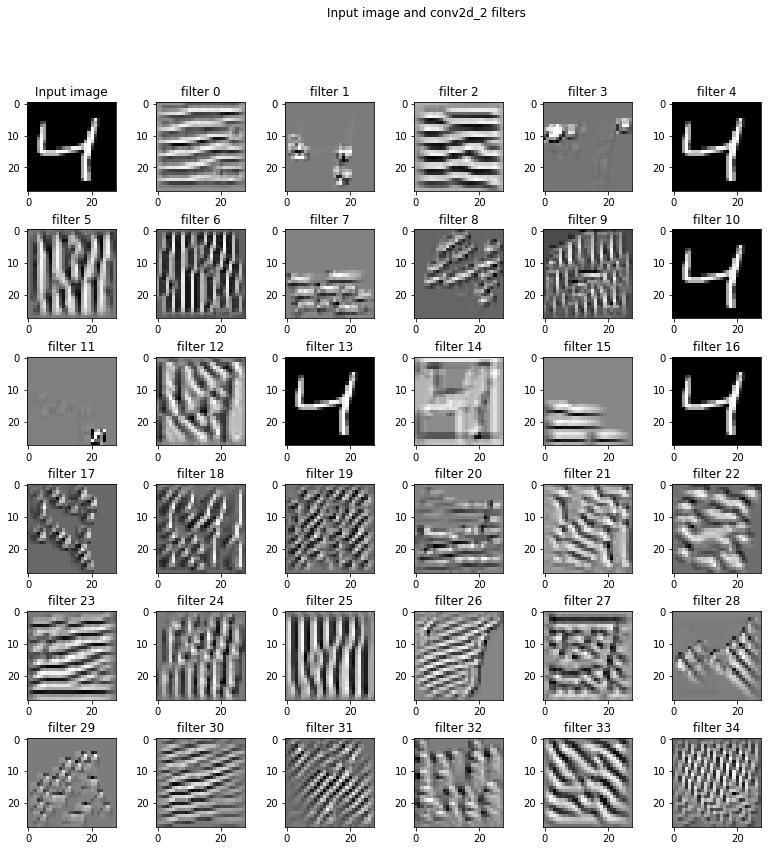

In [39]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name ='conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model2.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model2.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()